# Evaluation of Prediction Models(KNN) using the Titanic Dataset 

## 1. Defining the Question

### a) Specifying the Question


> You are presented with a data from the Titanic tradegy containing details of the passengers both the survivors and those who perished during the unfortunate Incident

> We intend to use KNN method of predicting trends in classifying various features related to the boarders and finding if they have a relationship with the rate of survival of these passenngers



### b) Defining the Metric for Success

> We intend to develop a model that can use the Kneighbors technique to predict the survival rate of the passengers using the provided features 
> Our model is supposed use classification method on the categorical data and we intend to achieve an accuracy of atleast 70% which should be tuned to elevates it's accuracy method 
> Tuning our model's parameters in order to improve the accuracy and reduce the error margin without overfitting

### c) Understanding the context 

> Survval of the passengers which is the target feature is dependent on:

i. The age of the passenger
ii. The Fare the passenger paid
iii. The cabin the passenger was in
iv. The gender of the passenger
v. The town they emarked to
vi. The relationships between the passengers

### d) Recording the Experimental Design

> We will use KNN Classifier to predict the cahnces of survival then tune our model to improve it's accuracy

### e) Data Relevance

> The data provided has enough features to create a model that can predict the survival rates favourably

## 1. Loading our Libraries

In [653]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

## 2. Reading the Data

In [654]:
# Loading the Dataset
 
train = pd.read_csv('train (5).csv')
test = pd.read_csv('test (1).csv')

In [655]:
# Preveiwing the head of the dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [656]:
# Preveiwing the head of the dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3. Checking our Data

In [657]:
# Creating a functions to check the details of our data 

# We create a function that will enable us to check for various information about our dataset
# Determining the no. of records in our dataset the N0. of colums, the duplicates, datatypes 
# and if there are any null values and duplicates

def check(data):
    df = data.shape
    df1 = data.isnull().value_counts()
    df2 = data.duplicated().value_counts()
    df3 = data.columns
    df4 = data.info()
    df5 = data.dtypes
    


    print('Data_Shape',"\n", df,"\n")
    print('Columns',"\n", df3,"\n") 
    print('Data info',"\n", df4,"\n")
    print('Data types',"\n", df5,"\n")
    print('Checking for No. of null values',"\n", df1,"\n") 
    print('Checking for No. of duplicates',"\n", df2)

In [658]:
# Applying function to the dataset
check(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Data_Shape 
 (891, 12) 

Columns 
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

Data info 
 None 

Data types 
 PassengerId      int64

In [659]:
# Applying function to the dataset
check(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
Data_Shape 
 (418, 11) 

Columns 
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

Data info 
 None 

Data types 
 PassengerId      int64
Pclass           int64
Name            object
Sex    

## 4. Tidying the Dataset

In [660]:
# Confirming the null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [661]:
# Confirming the duplicates
train.duplicated().sum()

0

In [662]:
# Confirming the duplicates
test.duplicated().sum()

0

#### The Datasets have to be done with the null values as the affect the accuracy of the prediction model

In [663]:
# We drop the null values on both datasets
trainer = train.dropna(axis= 0,subset = ['Age'])

In [664]:
# We drop the null values on both datasets
tester = test.dropna(axis= 0,subset = ['Age'])

In [665]:
trainer.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


#### Filling the null values on the age column with the mean age 

In [666]:
#  Finding the length of the values of these columns
length = trainer['Age'].size

In [667]:
#  Finding the length of the values of these columns

length2 = test['Age'].size

In [668]:
length

714

In [669]:
# 
sumed = trainer['Age'].sum()

In [670]:
sumed2 = test['Age'].sum()

In [671]:
mean_age = sumed// length
mean_age

29.0

In [672]:
mean_age2 = sumed2// length2
mean_age2

24.0

In [673]:
# Filling the null values with the mean age calculated
train['Age'].fillna(value = mean_age, inplace = True)

train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [674]:
# Filling the null values with the mean age calculated
test['Age'].fillna(value = mean_age2, inplace = True)

test['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    24.0
414    39.0
415    38.5
416    24.0
417    24.0
Name: Age, Length: 418, dtype: float64

In [675]:
train['Age'].isnull().sum()

0

In [676]:
test['Age'].isnull().sum()

0

> Now we have confirmed that we have gottten rid of all the null values

In [677]:
# Dropping irrelevant columns
trained = train.drop(['Cabin', 'Ticket','PassengerId'], axis = 1, inplace = False)

In [678]:
# Dropping irrelevant columns
tested = test.drop(['Cabin', 'Ticket','PassengerId'], axis = 1, inplace = False)

We drop the columns that do not contain categorical data and data relevant for analysis together with the cabin data as it has a lot of null values making not suitable for training 

In [679]:
trained.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C


In [680]:
tested.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S


In [681]:
# DROPPING more irelevant columns on analysis
trained.loc[train['Parch' ]== 0].value_counts().sum()

676

In [682]:
# DROPPING more irelevant columns on analysis
trained.loc[train['SibSp' ]== 0].value_counts().sum()

606

In [683]:
# DROPPING more irelevant columns on analysis
trained= trained.drop(['SibSp', 'Parch'], axis = 1, inplace = False)

In [684]:
trained.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S


In [685]:
trained.dropna(axis = 0, inplace = True)

In [686]:
trained.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [687]:
# Converting datatypes into category for EDA 
cols = ['Embarked', 'Name', 'Sex']

trained[cols] = trained[cols].astype('category')

In [688]:
trained.dtypes

Survived       int64
Pclass         int64
Name        category
Sex         category
Age          float64
Fare         float64
Embarked    category
dtype: object

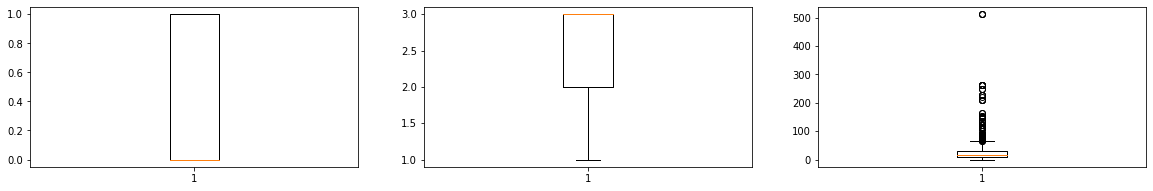

In [689]:
# Checking for outliers on the survived, pclass & fare 
plt.figure(figsize = (20,10))
plt.subplot(3,3,1)
plt.boxplot(x = trained['Survived'])
plt.subplot(3,3,2)
plt.boxplot(x = trained['Pclass'])
plt.subplot(3,3,3)
plt.boxplot(x = trained['Fare'])
plt.show()

> The data was almost normally distributed on the 2 columns survived, pclass but Fare had outliers as some people paid more for more xepensive suites 
> Majority of the boarders were from the age of 29years but there were people as old as 80 yrs 
> The data was converted to category on various columns from object datatypes to enable them to be used in the EDA

## 6. Exploratory Analysis

### Central Tendency Analysis


In [690]:
# Ploting the univariate summaries and recording our observations
#
trained['Age'].mode()

0    29.0
dtype: float64

In [691]:
# A description of the fare paid
trained['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [692]:
# Finding the most boarded class 
trained['Pclass'].mode()
# train['Pclass'].max()
# train['Pclass'].min()

0    3
dtype: int64

> Most passengers were of the age 29 years old
> Most passengers boarded the 3rd class
> Highest fare paid was 512 dollars
> Most people paid 32 dollars

### Ploting the univariate and bivariate summaries and recording our observations

Text(0.5, 1.0, 'Fare Count')

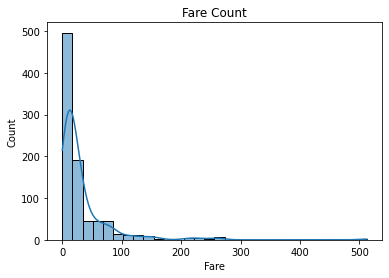

In [702]:
# Distribution of fare payment
ax = sns.histplot(data = trained, x = 'Fare', bins = 30, kde = True)
ax.set_title('Fare Count')

> Most boarders roughly below 50 dollars

Text(0.5, 1.0, 'Age Distribution')

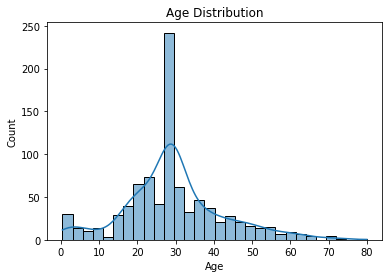

In [701]:
# Distribution of the ages across
new = trained['Age'].sort_values(ascending = True)

ax = sns.histplot(data = trained, x = new, kde = True)
ax.set_title('Age Distribution')


> Most passengers were aged 29years old

Text(0.5, 1.0, 'Fare Vs Passenger class')

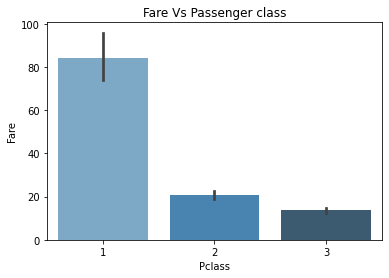

In [700]:
# Relationship between fare and class 
ax = sns.barplot(x = 'Pclass', y= 'Fare', data = trained, palette = 'Blues_d')
ax.set_title("Fare Vs Passenger class")


> The 1st class was the most expensive class as it generated the most in terms of fare

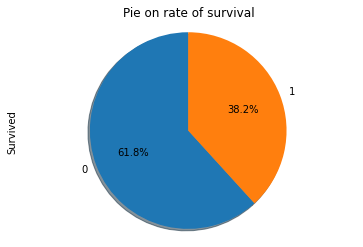

In [ ]:
# Pie chart on the rate of survival

# fig, ax1 = plt.subplots()
# ax1.pie(data)\

pie = trained['Survived'].value_counts()

pie.plot(kind = 'pie', autopct= '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Pie on rate of survival')
plt.show()

Majority of the boarders perished 61.8% yet only 38.2% survived

Text(0.5, 1.0, 'Relationship between Survival to the sex and fare paid ')

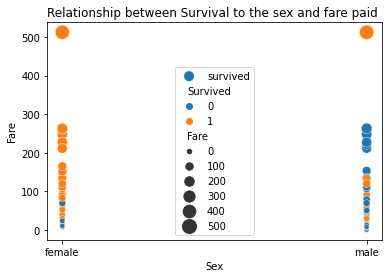

In [698]:
# The survived in relation to their sex and fare 
ax = sns.scatterplot(data = trained, x = 'Sex', y = 'Fare',hue= 'Survived', size = 'Fare', sizes = (20, 200),label= 'survived')
ax.set_title('Relationship between Survival to the sex and fare paid ')

> Most women were proritized when it came to those boarding the safety boats hence them being the ones who mostly survived

Text(0.5, 1.0, 'Relationship between Survival to the sex and fare paid ')

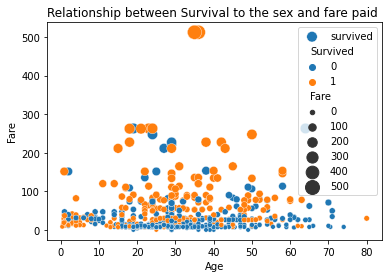

In [703]:
# The survived in relation to their age and fare 
ax = sns.scatterplot(data = trained, x = 'Age', y = 'Fare',hue= 'Survived', size = 'Fare', sizes = (20, 200),label= 'survived')
ax.set_title('Relationship between Survival to the sex and fare paid ')

> The ones who paid the least fare mostly perished in the tragedy but those who paid average to high amounts of fare survived.

Text(0.5, 1.0, 'Amount of fare in realation to the towns Embarked')

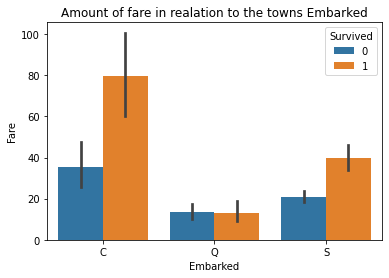

In [704]:
ax = sns.barplot(data = trained, x ='Embarked' , y ='Fare' , hue = 'Survived')
ax.set_title( 'Amount of fare in realation to the towns Embarked')

> Majority of the rich came from the port (C = Cherbourg; and the rest from  Q = Queenstown; and S = Southampton.

### Conclusion




> Survival was prioritized on those who paid more than others 
> It was dependent on the gender women being prioritized

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# 
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 8. Challenging the solution

### Finding colinearity in the dataset

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






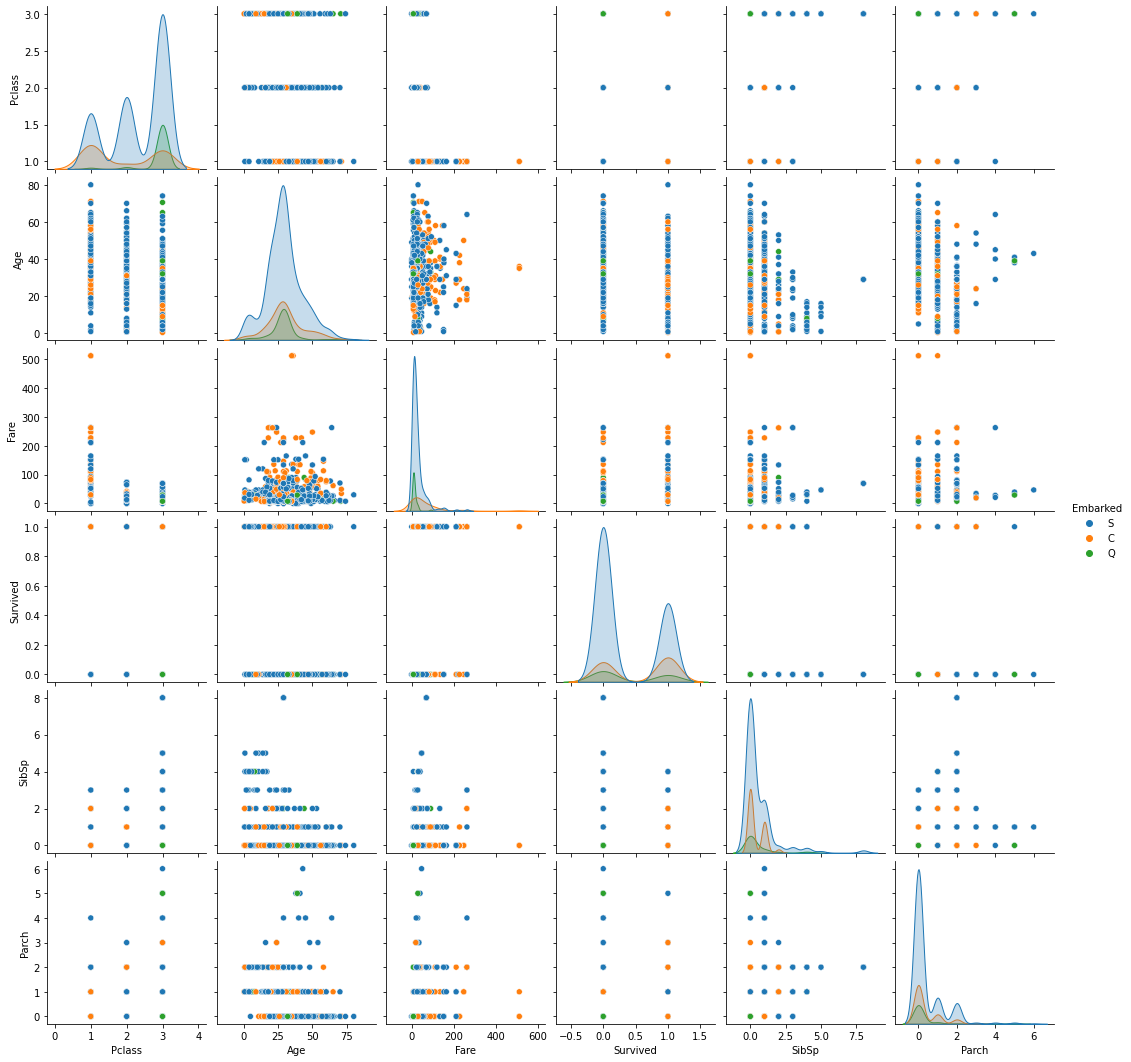

In [ ]:
# A pairplot to show relatioship beetween various columns 
#

corr = train[['Sex', 'Pclass','Age', 'Fare', 'Embarked','Survived', 'SibSp', 'Parch']]

sns.pairplot(corr, hue = 'Embarked')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Encoding the data to a format the computer can easily intepret
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Embarked'] = le.fit_transform(train['Embarked'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test['Embarked'] = le.fit_transform(test['Embarked'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test['Sex'] = le.fit_transform(test['Sex'])

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


In [ ]:
# Confirming the datatypes 
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [ ]:
# selecting the columns to use on the model training
trained = train[['Survived', 'Pclass','Sex','Age', 'Fare', 'Embarked', 'SibSp', 'Parch']]
trained

,Survived,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,0,3,1,22.0,7.2500,2,1,0
1,1,1,0,38.0,71.2833,0,1,0
2,1,3,0,26.0,7.9250,2,0,0
3,1,1,0,35.0,53.1000,2,1,0
4,0,3,1,35.0,8.0500,2,0,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2,0,0
887,1,1,0,19.0,30.0000,2,0,0
888,0,3,0,29.0,23.4500,2,1,2
889,1,1,1,26.0,30.0000,0,0,0


In [ ]:

tested = test[['Pclass','Sex','Age', 'Fare', 'Embarked', 'SibSp', 'Parch']]
tested

,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,3,1,34.5,7.8292,1,0,0
1,3,0,47.0,7.0000,2,1,0
2,2,1,62.0,9.6875,1,0,0
3,3,1,27.0,8.6625,2,0,0
4,3,0,22.0,12.2875,2,1,1
...,...,...,...,...,...,...,...
413,3,1,24.0,8.0500,2,0,0
414,1,0,39.0,108.9000,0,0,0
415,3,1,38.5,7.2500,2,0,0
416,3,1,24.0,8.0500,2,0,0


> wE DROPPED THE name and passenger ID columns because they are descrete data that have no connection to the target feature

In [ ]:
# Splitting the dataset into train and test
X = trained[['Pclass','Sex','Age', 'Fare', 'Embarked', 'SibSp', 'Parch']].values
y = trained[['Survived']].values.ravel()

# X = np.array(X.reshape(-1,1))

# X = X.reshape(-1,1)
# y.reshape(1,-1)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, y_train.shape

((668, 7), (668,))

In [ ]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Using the model to predict
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[110  29]
 [ 36  48]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       139
           1       0.62      0.57      0.60        84

    accuracy                           0.71       223
   macro avg       0.69      0.68      0.68       223
weighted avg       0.70      0.71      0.71       223



#### The accuracy of the model was at 70% at one neighbor therefore to improve the model we might need to tune some parameters

In [ ]:
# Calcutaing the error rate within a range of kneighbors
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

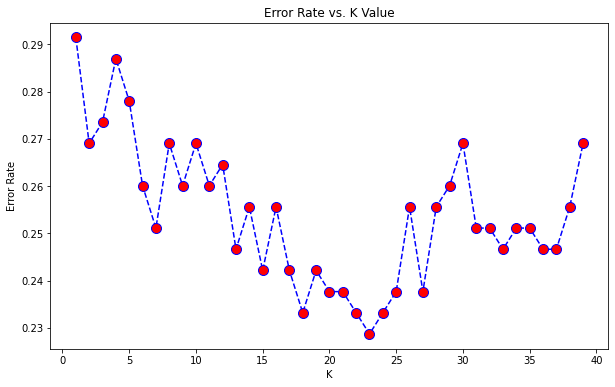

In [ ]:
# Plotting the error rate through the knn neighbors from a range of 1 to 40

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### The Error rate is highest at the top 3 neighbors but reduces most at 23 then continues to rise inconsistently as one add the neighbors

### Tuning Our KNN parameterS to better improve the perfomance of our model


In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,11,2))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 19
Best p: 1
Best n_neighbors: 5


#### After Tuning our model we found that the best leaf size 19, power parameter 1 which euchiledean and the neighbor no.s were 5

In [ ]:
# Running the model with the tunes parameters
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, p =1, leaf_size= 19)

knn.fit(X_train,y_train)



KNeighborsClassifier(leaf_size=19, p=1)

In [ ]:
# Finding the results of our tuning 
pred2 = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred2))

[[113  26]
 [ 36  48]]


In [ ]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       139
           1       0.65      0.57      0.61        84

    accuracy                           0.72       223
   macro avg       0.70      0.69      0.70       223
weighted avg       0.72      0.72      0.72       223



#### The model improves to 72% weighted average accuracy after tuning but this is not that helpful 

### Challenging the Solution

In [710]:
# Running the model with the tunes parameters using kneighbours which were lowest at the plot on the error rate 24 k neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 24, p =1, leaf_size= 19)

knn.fit(X_train,y_train)


KNeighborsClassifier(leaf_size=19, n_neighbors=24, p=1)

In [711]:
# Perfoming the prediction 
pred3 = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred3))

[[127  12]
 [ 38  46]]


In [712]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       139
           1       0.79      0.55      0.65        84

    accuracy                           0.78       223
   macro avg       0.78      0.73      0.74       223
weighted avg       0.78      0.78      0.76       223



### The Accuracy improves tremendously to 78% which is a great improvement to our model

#### Plotting the relationship between the training and test accuracy across the kneighbors

In [ ]:
# We calculate the training accuracy by running the model on the train set on various neughbors of range 1 to 11 

from sklearn.metrics import accuracy_score

n_neighbor = list(range(1,11))

rema = []

roma = []

for i in n_neighbor:
  kn = KNeighborsClassifier(n_neighbors = i )
  best = kn.fit(X_train, y_train)
# pREDICTING OUR Y VALUES

  pred1 = best.predict(X_test)
  pred2 = best.predict(X_train)

  # Getting the accuracy score at each neighbor

  ms1 = accuracy_score(y_test, pred1)
  ms2 = accuracy_score(y_train, pred2)

  # Appending the accuracy score to our list 

  rmse1 = np.sqrt(ms1)
  rmse2 = np.sqrt(ms2)

  rema.append(rmse1)
  roma.append(rmse2)

<function matplotlib.pyplot.show(close=None, block=None)>

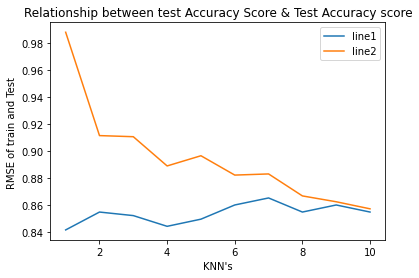

In [705]:
# Plotting the list on the trained data accuracy and the test data accuracy 

plt.plot(n_neighbor, rema, label = 'line1')
plt.plot(n_neighbor, roma, label = 'line2')

plt.xlabel("KNN's")
plt.ylabel('RMSE of train and Test ')
plt.legend()
plt.title( 'Relationship between test Accuracy Score & Test Accuracy score')
plt.show

#### The accuracy on the train data reduces to meet the test at 86% at the 

### Using our trained Data on a new Test data sample

In [ ]:
tested

,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,3,1,34.5,7.8292,1,0,0
1,3,0,47.0,7.0000,2,1,0
2,2,1,62.0,9.6875,1,0,0
3,3,1,27.0,8.6625,2,0,0
4,3,0,22.0,12.2875,2,1,1
...,...,...,...,...,...,...,...
413,3,1,24.0,8.0500,2,0,0
414,1,0,39.0,108.9000,0,0,0
415,3,1,38.5,7.2500,2,0,0
416,3,1,24.0,8.0500,2,0,0


In [ ]:
# Using our tuned prediction model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, p =1, leaf_size= 19)

knn.fit(X_train,y_train)


In [ ]:
# We drop all the  null values
tested.dropna()

,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,3,1,34.5,7.8292,1,0,0
1,3,0,47.0,7.0000,2,1,0
2,2,1,62.0,9.6875,1,0,0
3,3,1,27.0,8.6625,2,0,0
4,3,0,22.0,12.2875,2,1,1
...,...,...,...,...,...,...,...
413,3,1,24.0,8.0500,2,0,0
414,1,0,39.0,108.9000,0,0,0
415,3,1,38.5,7.2500,2,0,0
416,3,1,24.0,8.0500,2,0,0


In [ ]:
tested.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
SibSp       0
Parch       0
dtype: int64

In [ ]:
# Perfom the prediction 

pred5 = knn.predict(tested.values)
print(pred5)

[0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0
 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1
 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1
 0 1 0 1 0 0 1 0 0 0]


#### The prediction was possible possible ant the results were presented on an array 

### Conclusion 

#### The model was first at 70% then after tuning was improved on to 72% then after improvising using the results of the error rate plot it improved to 78%

#### The model was able to be used on a new dataset and produce results 